In [1]:
import pandas as pd
import numpy as np

### 网格分布型数据的创建

In [2]:
a = ['A', 'B', 'C']
b = [3, 5, 7]
X, Y = np.meshgrid(a, b)
c = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})
c.shape

(9, 2)

In [3]:
c

,x,y
0,A,3
1,B,3
2,C,3
3,A,5
4,B,5
5,C,5
6,A,7
7,B,7
8,C,7


### 数据类型：Categorical

In [4]:
cut = ['Fair', 'Good', 'Ideal', 'Very Good', 'Premium']
cut_factor1 = pd.Categorical(cut)
cut_factor1

['Fair', 'Good', 'Ideal', 'Very Good', 'Premium']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [5]:
cut_factor2 = pd.Categorical(cut, 
                             categories=['Fair', 'Good',  'Very Good', 'Premium', 'Ideal'], 
                             ordered=True)
cut_factor2

['Fair', 'Good', 'Ideal', 'Very Good', 'Premium']
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [6]:
# 重新指定类别排序
from pandas.api.types import CategoricalDtype
Cut = pd.Series(cut)
cat_dtype = CategoricalDtype(categories=['Fair', 'Good',  'Very Good', 'Premium', 'Ideal'], ordered=True)
Cut.astype(cat_dtype)

0         Fair
1         Good
2        Ideal
3    Very Good
4      Premium
dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [7]:
df = pd.DataFrame({'X': ['A', 'B', 'C'], '2010': [1, 3, 4], '2011':[3, 5, 7]})
df

,X,2010,2011
0,A,1,3
1,B,3,5
2,C,4,7


将宽数据转换为长数据，多行聚集为列

In [24]:
df_melt = pd.melt(df, id_vars='X', var_name='year', value_name='Value')
df_melt

,X,year,Value
0,A,2010,1
1,B,2010,3
2,C,2010,4
3,A,2011,3
4,B,2011,5
5,C,2011,7


将长数据转换为宽数据

In [16]:
df_pivot = df_melt.pivot_table(values='Value', index='X', columns='year')
df_pivot = df_pivot.reset_index()
df_pivot

year,X,2010,2011
0,A,1,3
1,B,3,5
2,C,4,7


变量的变换

In [17]:
df_melt['Value2'] = df_melt['Value'] * 2
df_melt

,X,year,Value,Value2
0,A,2010,1,2
1,B,2010,3,6
2,C,2010,4,8
3,A,2011,3,6
4,B,2011,5,10
5,C,2011,7,14


In [25]:
df_melt['Value2'] = df_melt.apply(lambda x: x['Value']*2 if x['year']=='2011' else x['Value'], axis=1)
df_melt

,X,year,Value,Value2
0,A,2010,1,1
1,B,2010,3,3
2,C,2010,4,4
3,A,2011,3,6
4,B,2011,5,10
5,C,2011,7,14


表格的排序

In [26]:
dat_sort1 = df_melt.sort_values(by='Value', ascending=True)
dat_sort1

,X,year,Value,Value2
0,A,2010,1,1
1,B,2010,3,3
3,A,2011,3,6
2,C,2010,4,4
4,B,2011,5,10
5,C,2011,7,14


In [27]:
dat_sort2 = df_melt.sort_values(by=['year', 'Value'], ascending=False)
dat_sort2

,X,year,Value,Value2
5,C,2011,7,14
4,B,2011,5,10
3,A,2011,3,6
2,C,2010,4,4
1,B,2010,3,3
0,A,2010,1,1


### plotnine

In [28]:
from plotnine import *
from plotnine.data import mtcars

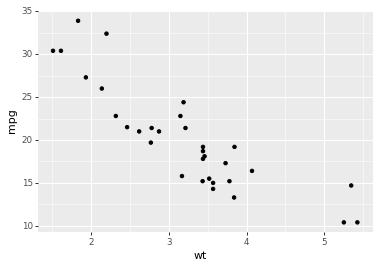

<ggplot: (118253706572)>

In [29]:
# scatter plot

(ggplot(mtcars, aes('wt', 'mpg'))
+ geom_point())

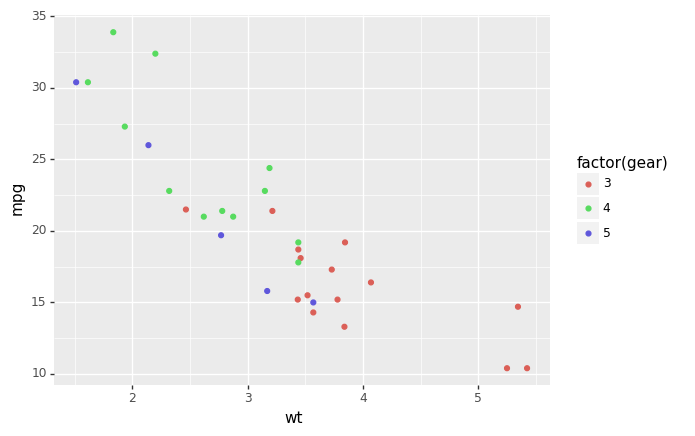

<ggplot: (118253895653)>

In [33]:
# scatter plot colored according some variable

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
+ geom_point())

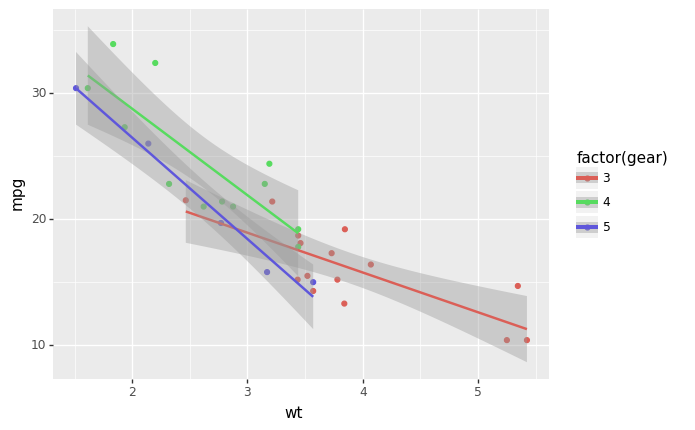

<ggplot: (118253850871)>

In [34]:
# scatter plot colored according some variable and smoothed linear line

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
+ geom_point()
+ stat_smooth(method='lm'))

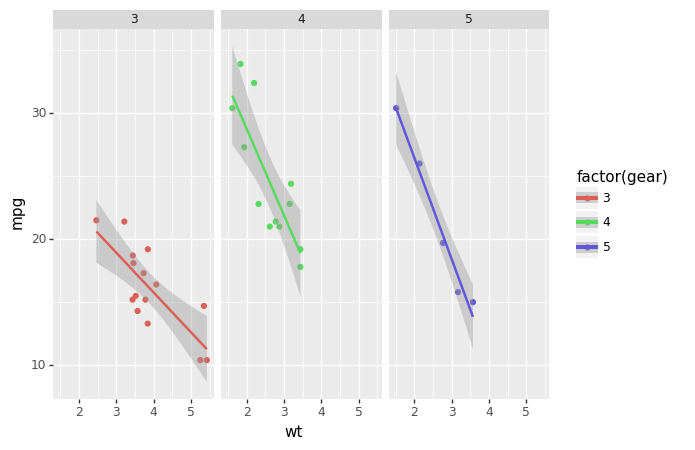

<ggplot: (118254111778)>

In [35]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))\
+ geom_point()
+ stat_smooth(method='lm')
+ facet_wrap('~gear'))

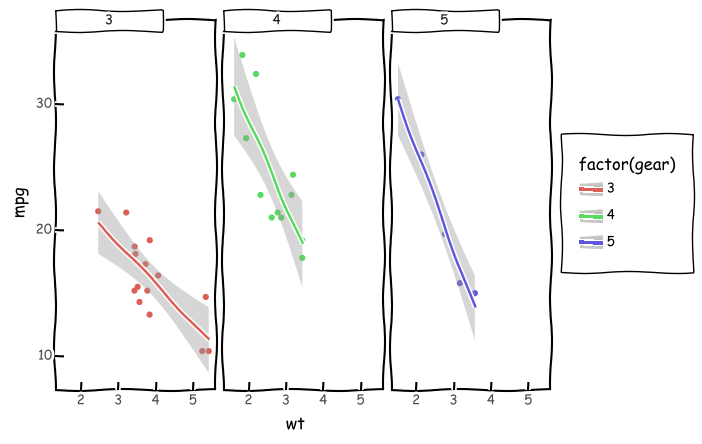

<ggplot: (118259522795)>

In [46]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))\
+ geom_point()
+ stat_smooth(method='lm')
+ facet_wrap('~gear')
+ theme_xkcd())